# WeatherPy 

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

from config import weather_api_key
from config import geoapify_key

from citipy import citipy

In [23]:
os.getcwd()

'C:\\Users\\sarah\\OneDrive\\Documents\\Homework\\python-api-challenge\\PyWeather'

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_longs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(long_range[0], long_range[1], size=1500)
lat_longs = zip(lats, longs)

# Identify nearest city for each lat, lng combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 597


In [18]:
weather_url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

city_weather = requests.get(weather_url + "&q=" + "London").json()

pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 51.5085, 'lon': -0.1257},
 'dt': 1682375777,
 'id': 2643743,
 'main': {'feels_like': 4.24,
          'humidity': 88,
          'pressure': 1013,
          'temp': 5.8,
          'temp_max': 6.86,
          'temp_min': 4.49},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 2075535,
         'sunrise': 1682311597,
         'sunset': 1682363428,
         'type': 2},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 360, 'speed': 2.06}}


In [19]:
weather_url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1 

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0        
    
    city_url = weather_url + "&q=" + city
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1


    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_long = city_weather["coord"]["lon"] 
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_long, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except: 
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")        



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | kas
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | enewetak
Processing Record 7 of Set 1 | polyarnyy
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | gadzhiyevo
Processing Record 15 of Set 1 | san ignacio de velasco
Processing Record 16 of Set 1 | kadugli
Processing Record 17 of Set 1 | remire-montjoly
Processing Record 18 of Set 1 | minas de marcona
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | dawei
Processing Record 22 of Set 1 | kavaratti
Processin

Processing Record 35 of Set 4 | kanpur
Processing Record 36 of Set 4 | port mathurin
Processing Record 37 of Set 4 | colonia
Processing Record 38 of Set 4 | puerto ayora
Processing Record 39 of Set 4 | harstad
Processing Record 40 of Set 4 | new plymouth
Processing Record 41 of Set 4 | susuman
Processing Record 42 of Set 4 | coron
Processing Record 43 of Set 4 | touros
Processing Record 44 of Set 4 | portrush
Processing Record 45 of Set 4 | sinop
Processing Record 46 of Set 4 | nova sintra
Processing Record 47 of Set 4 | brisas de zicatela
Processing Record 48 of Set 4 | atar
Processing Record 49 of Set 4 | nuku'alofa
Processing Record 0 of Set 5 | taroa
Processing Record 1 of Set 5 | hammerfest
Processing Record 2 of Set 5 | port alfred
Processing Record 3 of Set 5 | saint-philippe
Processing Record 4 of Set 5 | ancud
Processing Record 5 of Set 5 | kapa'a
Processing Record 6 of Set 5 | isoka
Processing Record 7 of Set 5 | borogontsy
Processing Record 8 of Set 5 | ras gharib
City not f

Processing Record 29 of Set 8 | sars
Processing Record 30 of Set 8 | palikir - national government center
Processing Record 31 of Set 8 | ugoofaaru
Processing Record 32 of Set 8 | kulia village
City not found. Skipping...
Processing Record 33 of Set 8 | tabarka
Processing Record 34 of Set 8 | vogan
Processing Record 35 of Set 8 | changji
Processing Record 36 of Set 8 | morondava
Processing Record 37 of Set 8 | brigantine
Processing Record 38 of Set 8 | ellensburg
Processing Record 39 of Set 8 | bokoro
Processing Record 40 of Set 8 | kayangel
Processing Record 41 of Set 8 | mantua
Processing Record 42 of Set 8 | chihuahua
Processing Record 43 of Set 8 | la belgica
Processing Record 44 of Set 8 | kati
Processing Record 45 of Set 8 | ayod
City not found. Skipping...
Processing Record 46 of Set 8 | ouled mimoun
Processing Record 47 of Set 8 | mengyin
Processing Record 48 of Set 8 | walvis bay
Processing Record 49 of Set 8 | concepcion
Processing Record 0 of Set 9 | tidjikja
Processing Reco

Processing Record 18 of Set 12 | kapuskasing
Processing Record 19 of Set 12 | salekhard
Processing Record 20 of Set 12 | sibirskiy
Processing Record 21 of Set 12 | north battleford
Processing Record 22 of Set 12 | sechura
Processing Record 23 of Set 12 | porto seguro
Processing Record 24 of Set 12 | dalbandin
Processing Record 25 of Set 12 | hami
Processing Record 26 of Set 12 | auki
Processing Record 27 of Set 12 | payson
Processing Record 28 of Set 12 | christchurch
Processing Record 29 of Set 12 | ponta delgada
Processing Record 30 of Set 12 | rikaze
Processing Record 31 of Set 12 | new norfolk
Processing Record 32 of Set 12 | at taraf
Processing Record 33 of Set 12 | baruun-urt
Processing Record 34 of Set 12 | souillac
Processing Record 35 of Set 12 | namibe
Processing Record 36 of Set 12 | lucon
Processing Record 37 of Set 12 | burley
Processing Record 38 of Set 12 | galliano
Processing Record 39 of Set 12 | mormugao
Processing Record 40 of Set 12 | mahanje
Processing Record 41 of

In [20]:
city_data_df = pd.DataFrame(city_data)

city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [24]:
city_data_df.to_csv("C:\\Users\\sarah\\OneDrive\\Documents\\Homework\\python-api-challenge\\PyWeather\\my_cities.csv", index_label="City_ID")

In [26]:
city_data_df = pd.read_csv("C:\\Users\\sarah\\OneDrive\\Documents\\Homework\\python-api-challenge\\PyWeather\\my_cities.csv", index_col="City_ID")

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,6.73,45,0,5.14,US,1682375904
1,bethel,41.3712,-73.4140,14.12,38,40,3.09,US,1682375904
2,kas,36.2018,29.6377,16.20,58,0,1.79,TR,1682375904
3,bilibino,68.0546,166.4372,-4.24,55,1,1.49,RU,1682375904
4,yellowknife,62.4560,-114.3525,8.29,46,75,2.57,CA,1682375905


# Latitude vs Temperature

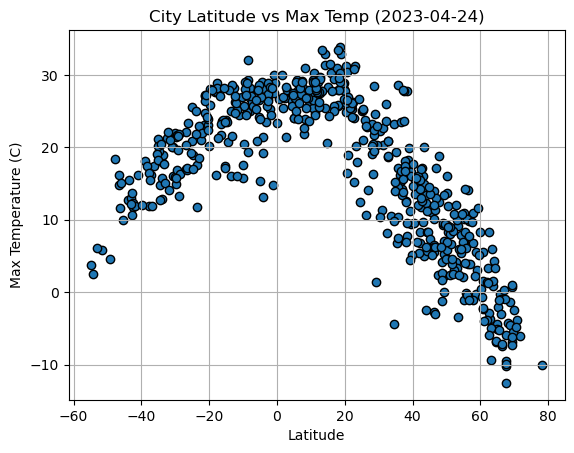

<Figure size 640x480 with 0 Axes>

In [38]:
x_lat = city_data_df["Lat"]
y_temp = city_data_df["Max Temp"]

temp_scatter = plt.scatter(x_lat, y_temp, edgecolors="black")

plt.title("City Latitude vs Max Temp (2023-04-24)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

plt.show()

plt.savefig("C:\\Users\\sarah\\OneDrive\\Documents\\Homework\\python-api-challenge\\PyWeather\\FigTemp.png")

# Latitude vs Humidity

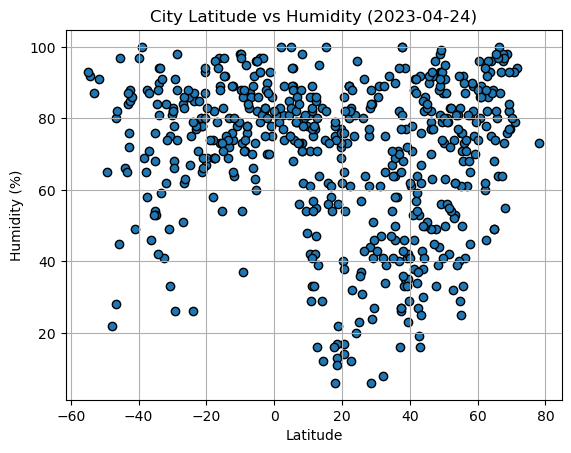

<Figure size 640x480 with 0 Axes>

In [45]:
y_hum = city_data_df["Humidity"]

hum_scatter = plt.scatter(x_lat, y_hum, edgecolors="black")

plt.title("City Latitude vs Humidity (2023-04-24)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.show()

plt.savefig("C:\\Users\\sarah\\OneDrive\\Documents\\Homework\\python-api-challenge\\PyWeather\\FigHumidity.png")

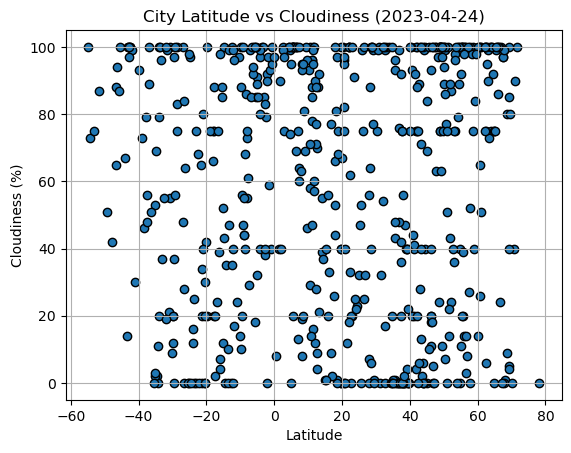

<Figure size 640x480 with 0 Axes>

In [46]:
y_cloud = city_data_df["Cloudiness"]

hum_scatter = plt.scatter(x_lat, y_cloud, edgecolors="black")

plt.title("City Latitude vs Cloudiness (2023-04-24)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.show()

plt.savefig("C:\\Users\\sarah\\OneDrive\\Documents\\Homework\\python-api-challenge\\PyWeather\\FigClouds.png")

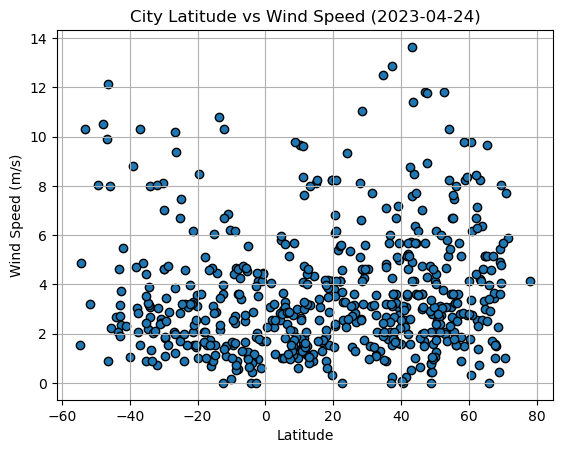

<Figure size 640x480 with 0 Axes>

In [52]:
y_wind = city_data_df["Wind Speed"]

hum_scatter = plt.scatter(x_lat, y_wind, edgecolors="black")

plt.title("City Latitude vs Wind Speed (2023-04-24)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

plt.show()
      
plt.savefig("C:\\Users\\sarah\\OneDrive\\Documents\\Homework\\python-api-challenge\\PyWeather\\FigWind.png")

In [165]:
def plot_linearregression(x_values, y_values, y_label, annotation_loc):
    #correlation = (st.pearsonr(x_s_lat, y_s_temp)[0])**2
    
    model = st.linregress(x_values, y_values)

    y_pred = x_values * model[0] + model[1]

    plt.scatter(x_values, y_values)
    plt.plot(x_values, y_pred, color = "red")
    #plt.title("Northern Cities Temperature vs Latitude Linear Regression Plot")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)

    line_eq = f" y = {round(model[0],2)}x + {round(model[1],2)}"
    plt.annotate(line_eq, annotation_loc, fontsize=15, color="red")
    plt.show()

    print(f"The R squared is: {(model[2])**2}.")


In [159]:
northern_cities_df = city_data_df[city_data_df["Lat"] > 0]
southern_cities_df = city_data_df[city_data_df["Lat"] < 0]

northern_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,6.73,45,0,5.14,US,1682375904
1,bethel,41.3712,-73.4140,14.12,38,40,3.09,US,1682375904
2,kas,36.2018,29.6377,16.20,58,0,1.79,TR,1682375904
3,bilibino,68.0546,166.4372,-4.24,55,1,1.49,RU,1682375904
4,yellowknife,62.4560,-114.3525,8.29,46,75,2.57,CA,1682375905


# Temperature vs Latitude Regression Plots

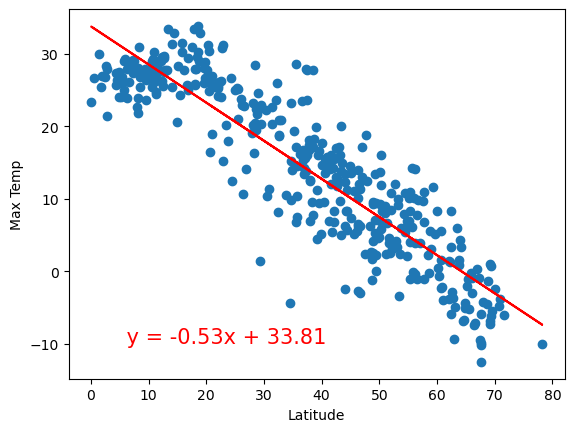

The R squared is: 0.8108229263787585.


In [164]:
x_n_lat = northern_cities_df["Lat"]
y_n_temp = northern_cities_df["Max Temp"]

plot_linearregression(x_n_lat, y_n_temp, "Max Temp", (5, -10))


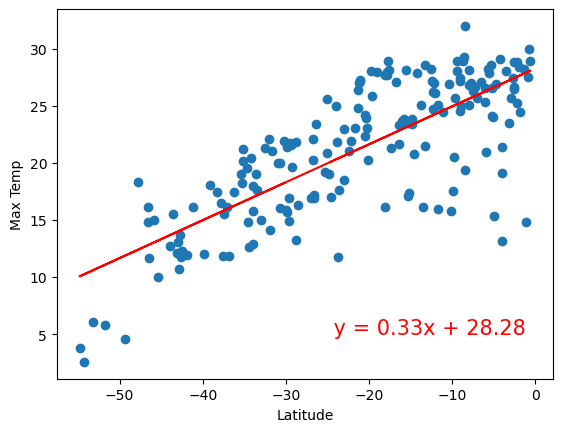

The R squared is: 0.5928501933220623.


In [168]:
x_s_lat = southern_cities_df["Lat"]
y_s_temp = southern_cities_df["Max Temp"]

plot_linearregression(x_s_lat, y_s_temp, "Max Temp", (-25, 5))

In [194]:
print("There is a strong negative correlation between Maximum Temperature and wind speed for cities in the Northern Hempisphere and a strong positive correlation for those in the Southern Hemispheres.  The linear equation fits both sets of data.")

There is a strong negative correlation between Maximum Temperature and wind speed for cities in the Northern Hempisphere and a strong positive correlation for those in the Southern Hemispheres.  The linear equation fits both sets of data.


# Humidity vs Latitude Regression plots


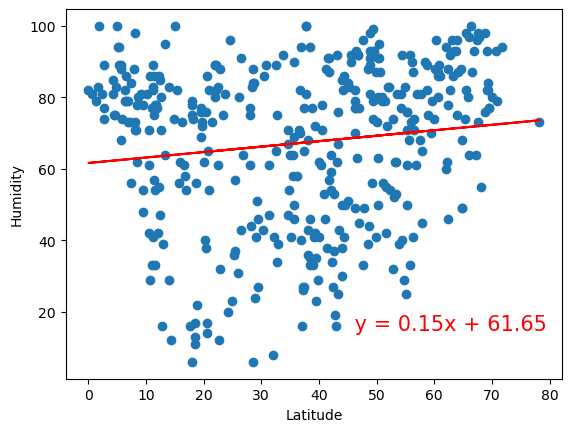

The R squared is: 0.017619795347357668.


In [171]:
y_n_hum = northern_cities_df["Humidity"]

plot_linearregression(x_n_lat, y_n_hum, "Humidity", (45, 15))

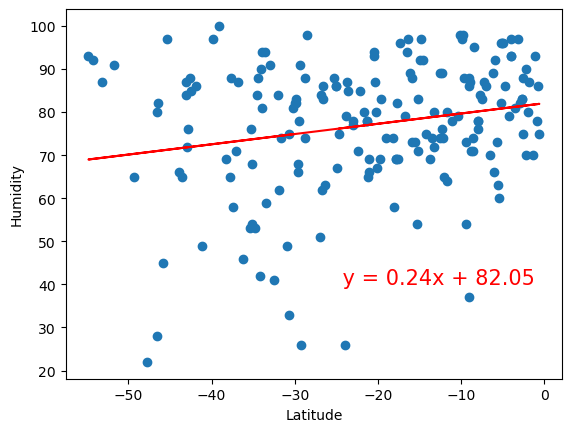

The R squared is: 0.046103628869899285.


In [174]:
y_s_hum = southern_cities_df["Humidity"]

plot_linearregression(x_s_lat, y_s_hum, "Humidity", (-25, 40))

In [195]:
print("There does not seem to be a correlation between humidity and latitude for cities in either the Northern or Southern hemisphere.  The linear equation does not fit either set of data.")

There does not seem to be a correlation between humidity and latitude for cities in either the Northern or Southern hemisphere.  The linear equation does not fit either set of data.


# Cloudiness vs Latitude

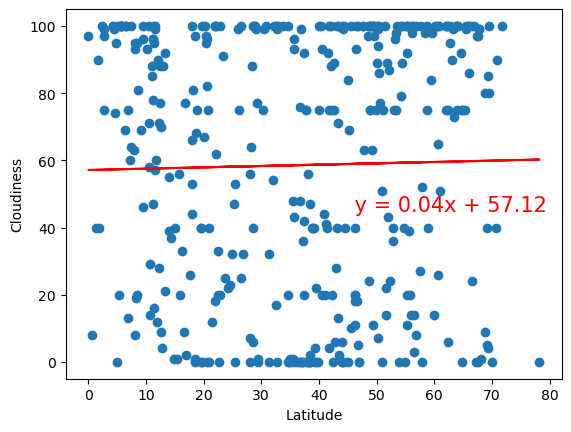

The R squared is: 0.00041052601168259085.


In [179]:
y_n_cloud = northern_cities_df["Cloudiness"]

plot_linearregression(x_n_lat, y_n_cloud, "Cloudiness", (45, 45))

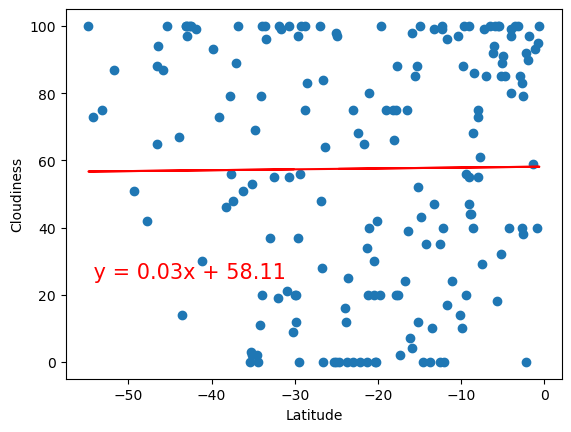

The R squared is: 0.00010322252203563402.


In [188]:
y_s_cloud = southern_cities_df["Cloudiness"]

plot_linearregression(x_s_lat, y_s_cloud, "Cloudiness", (-55, 25))

In [196]:
print("There does not seem to be a correlation between cloudiness and latitude for cities in either the Northern or Southern hemisphere.  The linear equation does not fit either set of data.")

There does not seem to be a correlation between cloudiness and latitude for cities in either the Northern or Southern hemisphere.  The linear equation does not fit either set of data.


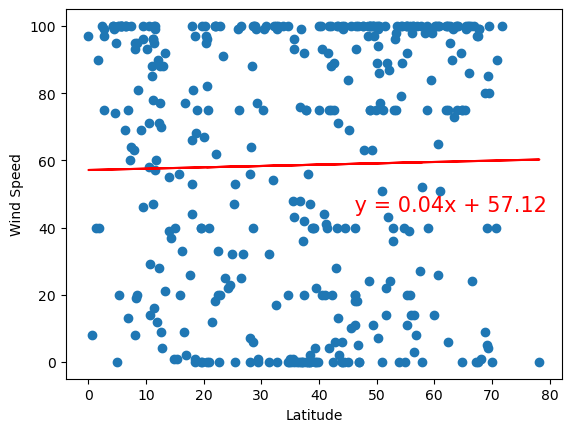

The R squared is: 0.00041052601168259085.


In [189]:
y_n_wind = northern_cities_df["Wind Speed"]

plot_linearregression(x_n_lat, y_n_cloud, "Wind Speed", (45, 45))

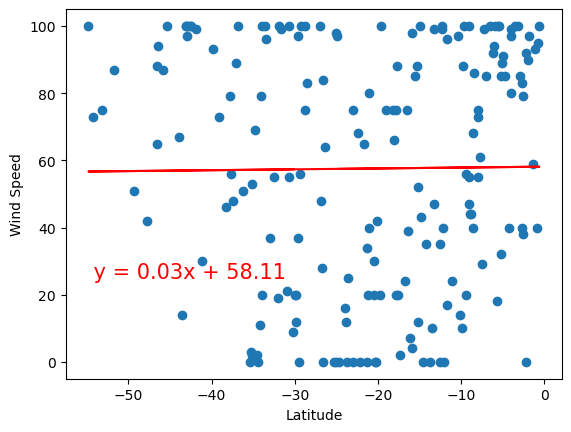

The R squared is: 0.00010322252203563402.


In [192]:
y_s_wind = southern_cities_df["Wind Speed"]

plot_linearregression(x_s_lat, y_s_cloud, "Wind Speed", (-55, 25))

In [197]:
print("There does not seem to be a correlation between wind speed and latitude for cities in either the Northern or Southern hemisphere.  The linear equation does not fit either set of data.")

There does not seem to be a correlation between wind speed and latitude for cities in either the Northern or Southern hemisphere.  The linear equation does not fit either set of data.
